# View for LSST filters with atmosphere and redshifted spectra

- author  :Sylvie Dagoret-Campagne
- affiliaiton : IJCLab/IN2P3/CNRS
- creation date : December 2nd 2021
- update date :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.gridspec as gridspec
import mpl_toolkits.axisartist as AA
import os
%matplotlib inline

In [20]:
import pysynphot as S

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
from scipy import interpolate

# Atmospheric file
- atmospheric file produced by ViewAllAtmosphere.ipynb

In [4]:
atm_file="basic_atmtransmavermimax.csv"

In [5]:
df_atm=pd.read_csv(atm_file,index_col=None)

In [6]:
df_atm

,Unnamed: 0,wl,transm0,transmworse,transmbest
0,0,250.0,0.000000,0.000000,0.000000
1,1,251.0,0.000000,0.000000,0.000000
2,2,252.0,0.000000,0.000000,0.000000
3,3,253.0,0.000000,0.000000,0.000000
4,4,254.0,0.000000,0.000000,0.000000
...,...,...,...,...,...
946,946,1196.0,0.931895,0.980392,0.860064
947,947,1197.0,0.931895,0.980392,0.860064
948,948,1198.0,0.904521,0.975520,0.817188
949,949,1199.0,0.904521,0.975520,0.817188


In [7]:
wl_atm_mean = df_atm["wl"]
trans_atm_mean =  df_atm["transm0"]

wl_atm_worse = df_atm["wl"]
trans_atm_worse =  df_atm["transmworse"]

wl_atm_best = df_atm["wl"]
trans_atm_best =  df_atm["transmbest"]

# LSST fileter file

In [8]:
datafilename='../data/lsst/filters/transmissions-LSST.dat'

In [9]:
df=pd.read_csv(datafilename,names=['wl','Topt','Tccd','U','G','R','I','Z','Y4','atm'],sep='\t')

In [10]:
wl=df['wl']
U=df['U']/100.
G=df['G']/100.
R=df['R']/100.
I=df['I']/100.
Z=df['Z']/100.
Y4=df['Y4']/100.

Text(0.5, 1.0, 'Effective filter transmission (no atm)')

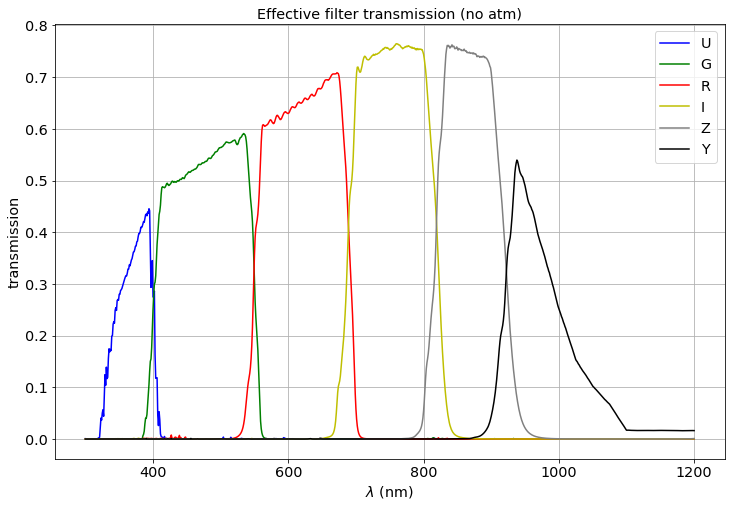

In [11]:
plt.plot(wl,U,'b',label="U")
plt.plot(wl,G,'g',label="G")
plt.plot(wl,R,'r',label="R")
plt.plot(wl,I,'y',label="I")
plt.plot(wl,Z,'grey',label="Z")
plt.plot(wl,Y4,'k',label="Y")
plt.grid()
plt.legend()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("transmission")
plt.title("Effective filter transmission (no atm)")

Text(0.5, 1.0, 'Effective filter transmission (no atm)')

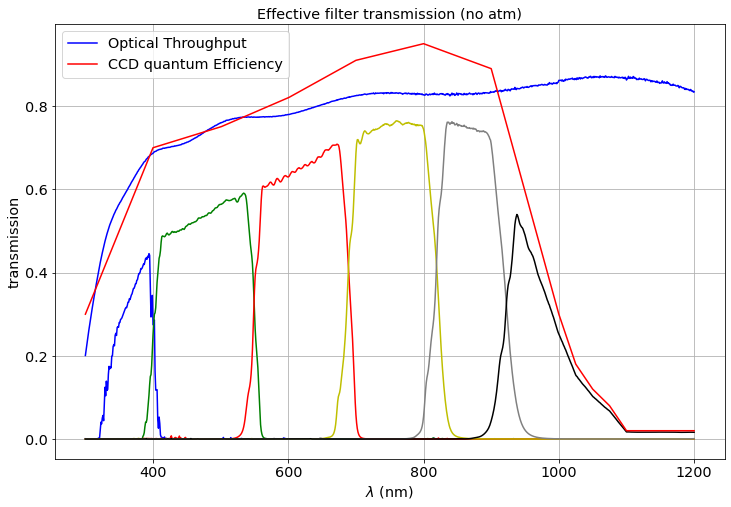

In [12]:
plt.plot(wl,U,'b')
plt.plot(wl,G,'g')
plt.plot(wl,R,'r')
plt.plot(wl,I,'y')
plt.plot(wl,Z,'grey')
plt.plot(wl,Y4,'k')
plt.plot(wl,df["Topt"]/100,"b-",label="Optical Throughput")
plt.plot(wl,df["Tccd"]/100,"r-",label="CCD quantum Efficiency") 
plt.grid()
plt.legend()
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("transmission")
plt.title("Effective filter transmission (no atm)")

# Multiply by atmosphere

In [13]:
fcn_u = interpolate.interp1d(wl, U)
fcn_g = interpolate.interp1d(wl, G)
fcn_r = interpolate.interp1d(wl, R)
fcn_i = interpolate.interp1d(wl, I)
fcn_z = interpolate.interp1d(wl, Z)
fcn_y = interpolate.interp1d(wl, Y4)

In [14]:
fcn_atm= interpolate.interp1d(wl_atm_mean, trans_atm_mean)

In [15]:
U2=U*fcn_atm(wl)
G2=G*fcn_atm(wl)
R2=R*fcn_atm(wl)
I2=I*fcn_atm(wl)
Z2=Z*fcn_atm(wl)
Y2=Y4*fcn_atm(wl)

# plot

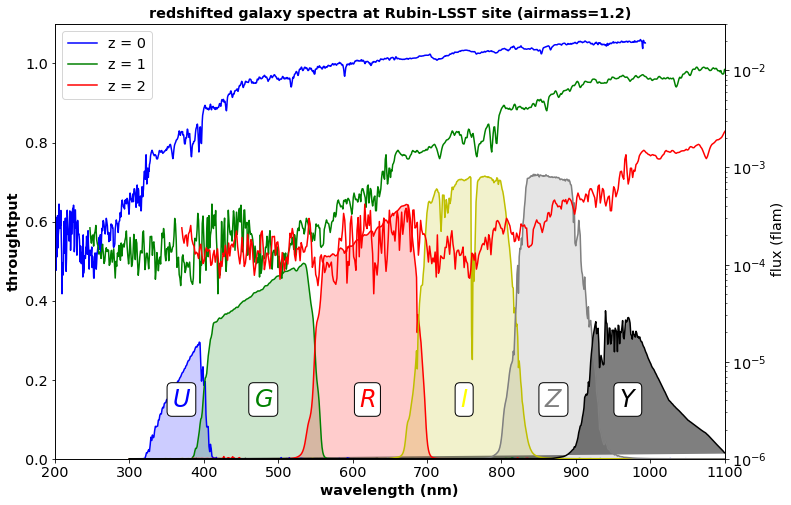

In [71]:
fig, ax1 = plt.subplots()

#ax1.plot(wl_atm_mean, trans_atm_mean,'k',lw=2,label=' average atmospheric transmission')
#ax1.plot(wl_atm_best, trans_atm_best,'b:',lw=2,label=' min AOD and PWV')
#ax1.plot(wl_atm_worse, trans_atm_worse,'r:',lw=2,label='max AOD and PWV')

#ax1.plot(wl,U,'b:', label="_nolegend_")
#ax1.plot(wl,G,'g:',label="_nolegend_")
#ax1.plot(wl,R,'r:',label="_nolegend_")
#ax1.plot(wl,I,'y:',label="_nolegend_")
#ax1.plot(wl,Z,color='grey',ls=':',label="_nolegend_")
#ax1.plot(wl,Y4,'k:',label="_nolegend_")

ax1.plot(wl,U2,'b-', label="_nolegend_")
ax1.fill(wl,U2,'b-', alpha=0.2,label="_nolegend_")
ax1.plot(wl,G2,'g-',label="_nolegend_")
ax1.fill(wl,G2,'g-', alpha=0.2,label="_nolegend_")
ax1.plot(wl,R2,'r-',label="_nolegend_")
ax1.fill(wl,R2,'r-', alpha=0.2,label="_nolegend_")
ax1.plot(wl,I2,'y-',label="_nolegend_")
ax1.fill(wl,I2,'y-', alpha=0.2,label="_nolegend_")
ax1.plot(wl,Z2,color='grey',ls='-',label="_nolegend_")
ax1.fill(wl,Z2,color='grey', alpha=0.2,label="_nolegend_")
ax1.plot(wl,Y2,'k-',label="_nolegend_")
ax1.fill(wl,Y2,'k-', alpha=0.5,label="_nolegend_")


ax1.set_title("redshifted galaxy spectra at Rubin-LSST site (airmass=1.2)",fontweight='bold')
ax1.set_xlabel("wavelength (nm)",fontweight='bold')
ax1.set_ylabel("throughtput",fontweight='bold')
ax1.set_ylim(0.,1.1)
#plt.legend(loc=2)

plt.xlim(200.,1100)
plt.text(370, 0.15, r'$U$',
         {'color': 'blue', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.text(480, 0.15, r'$G$',
         {'color': 'green', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.text(620, 0.15, r'$R$',
         {'color': 'red', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.text(750, 0.15, r'$I$',
         {'color': 'yellow', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.text(870, 0.15, r'$Z$',
         {'color': 'grey', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.text(970, 0.15, r'$Y$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
ax2 = ax1.twinx()

# 'grid', 'kc96'
#AA_README_KC96           sb_template.fits         starb4_template.fits
#bulge_template.fits      sc_template.fits         starb5_template.fits
#elliptical_template.fits starb1_template.fits     starb6_template.fits
#s0_template.fits         starb2_template.fits     tupar7989a.fits
#sa_template.fits         starb3_template.fits

# 'grid', 'agn'
#AA_README_AGN          ngc1068_template.fits  seyfert1_template.fits
#liner_template.fits    qso_template.fits      seyfert2_template.fits

gal = S.FileSpectrum(os.path.join(os.environ['PYSYN_CDBS'], 'grid', 'kc96', 'elliptical_template.fits'))
#gal = S.FileSpectrum(os.path.join(os.environ['PYSYN_CDBS'], 'grid', 'kc96', 'sc_template.fits'))
#gal = S.FileSpectrum(os.path.join(os.environ['PYSYN_CDBS'], 'grid', 'kc96', 'starb6_template.fits'))
#gal = S.FileSpectrum(os.path.join(os.environ['PYSYN_CDBS'], 'grid', 'kc96', 'tupar7989a.fits'))

#gal = S.FileSpectrum(os.path.join(os.environ['PYSYN_CDBS'], 'grid', 'agn', 'seyfert2_template.fits'))


redshifts = [0, 1, 2]
colors = 'bgr'

for z, c in zip(redshifts, colors):
    gal_z = gal.redshift(z)
    label=f"z = {z}"
    ax2.plot(gal_z.wave/10., gal_z.flux, color=c,label=label)

#ax2.set_xlabel(starburst.waveunits)
ax2.set_ylabel(f" flux ({starburst.fluxunits})")
ax2.set_yscale('log')

# kc96
ax2.set_ylim(1e-6,3e-2)


# agn
#ax2.set_ylim(1e-3,5e-1)

ax2.legend(loc="upper left")
#ax2.set_logy()


#ax2.set_ylabel("LSST throughput",fontweight='bold')
#ax2.set_ylim(0.,1.1)
plt.savefig("AtmTransparency_LSST_RedshiftGalaxy.pdf")